In [1]:
!pip install pandas fredapi numpy matplotlib seaborn plotly prophet scikit-learn statsmodels



  Using cached pandas-2.3.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached fredapi-0.5.2-py3-none-any.whl.metadata (5.0 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached prophet-1.2.1-py3-none-macosx_11_0_arm64.whl.metadata (3.5 kB)
  Using cached scikit_learn-1.7.2-cp313-cp313-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached statsmodels-0.14.5-cp313-cp313-macosx_11_0_arm64.whl.metadata (9.5 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp313-cp313-macosx_10_13_universal2.whl.metadata (112 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
  Using cached cmdstanp

In [2]:
import pandas as pd
from fredapi import Fred
fred = Fred(api_key='e1ab1d32d6233f0589e41d8a74f37174')
# Collect data
unemployment = fred.get_series('UNRATE')
cpi = fred.get_series('CPIAUCSL')
gdp = fred.get_series('GDP')
dff = fred.get_series('DFF')
consumer = fred.get_series('UMCSENT')


# Combine into dataframe
economic_data = pd.DataFrame({
'unemployment': unemployment,
'cpi': cpi,
'gdp': gdp,
'dff': dff,
'consumer' : consumer
})

In [3]:
economic_data

,unemployment,cpi,gdp,dff,consumer
1946-01-01,NaN,NaN,NaN,NaN,NaN
1946-04-01,NaN,NaN,NaN,NaN,NaN
1946-07-01,NaN,NaN,NaN,NaN,NaN
1946-10-01,NaN,NaN,NaN,NaN,NaN
1947-01-01,NaN,21.48,243.164,NaN,NaN
...,...,...,...,...,...
2025-11-13,NaN,NaN,NaN,3.88,NaN
2025-11-14,NaN,NaN,NaN,3.88,NaN
2025-11-15,NaN,NaN,NaN,3.88,NaN
2025-11-16,NaN,NaN,NaN,3.88,NaN


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

In [5]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

In [6]:
print("="*60)
print("EXPLORATORY DATA ANALYSIS - ECONOMIC INDICATORS")
print("="*60)

EXPLORATORY DATA ANALYSIS - ECONOMIC INDICATORS


In [7]:
print("\n📊 STEP 1: DATA OVERVIEW")
print("-"*60)

def data_overview(df):
    """
    Comprehensive data overview
    """
    print(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
    print(f"\nDate Range: {df.index.min().date()} to {df.index.max().date()}")
    print(f"Total Time Span: {(df.index.max() - df.index.min()).days} days")
    
    print("\n📋 Column Names:")
    for i, col in enumerate(df.columns, 1):
        print(f"  {i}. {col}")
    
    print("\n📈 Data Types:")
    print(df.dtypes)
    
    print("\n🔍 First 5 Rows:")
    display(df.head())
    
    print("\n🔍 Last 5 Rows:")
    display(df.tail())
    
    print("\n📏 Dataset Info:")
    df.info()

data_overview(economic_data)


📊 STEP 1: DATA OVERVIEW
------------------------------------------------------------
Dataset Shape: 26167 rows × 5 columns

Date Range: 1946-01-01 to 2025-11-17
Total Time Span: 29175 days

📋 Column Names:
  1. unemployment
  2. cpi
  3. gdp
  4. dff
  5. consumer

📈 Data Types:
unemployment    float64
cpi             float64
gdp             float64
dff             float64
consumer        float64
dtype: object

🔍 First 5 Rows:


,unemployment,cpi,gdp,dff,consumer
1946-01-01,NaN,NaN,NaN,NaN,NaN
1946-04-01,NaN,NaN,NaN,NaN,NaN
1946-07-01,NaN,NaN,NaN,NaN,NaN
1946-10-01,NaN,NaN,NaN,NaN,NaN
1947-01-01,NaN,21.48,243.164,NaN,NaN



🔍 Last 5 Rows:


,unemployment,cpi,gdp,dff,consumer
2025-11-13,NaN,NaN,NaN,3.88,NaN
2025-11-14,NaN,NaN,NaN,3.88,NaN
2025-11-15,NaN,NaN,NaN,3.88,NaN
2025-11-16,NaN,NaN,NaN,3.88,NaN
2025-11-17,NaN,NaN,NaN,3.88,NaN



📏 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26167 entries, 1946-01-01 to 2025-11-17
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   unemployment  932 non-null    float64
 1   cpi           945 non-null    float64
 2   gdp           314 non-null    float64
 3   dff           26073 non-null  float64
 4   consumer      665 non-null    float64
dtypes: float64(5)
memory usage: 1.2 MB



📊 STEP 2: MISSING DATA ANALYSIS
------------------------------------------------------------

🔴 Missing Data Summary:
              Missing_Count  Percentage
gdp                   25853   98.800015
consumer              25502   97.458631
unemployment          25235   96.438262
cpi                   25222   96.388581
dff                      94    0.359231


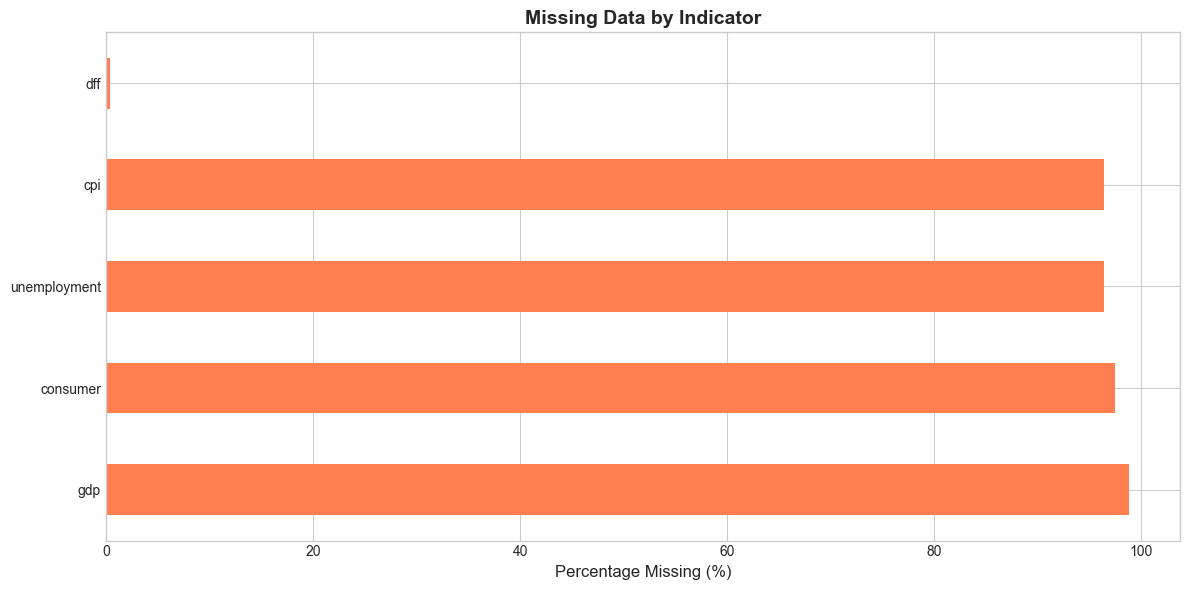

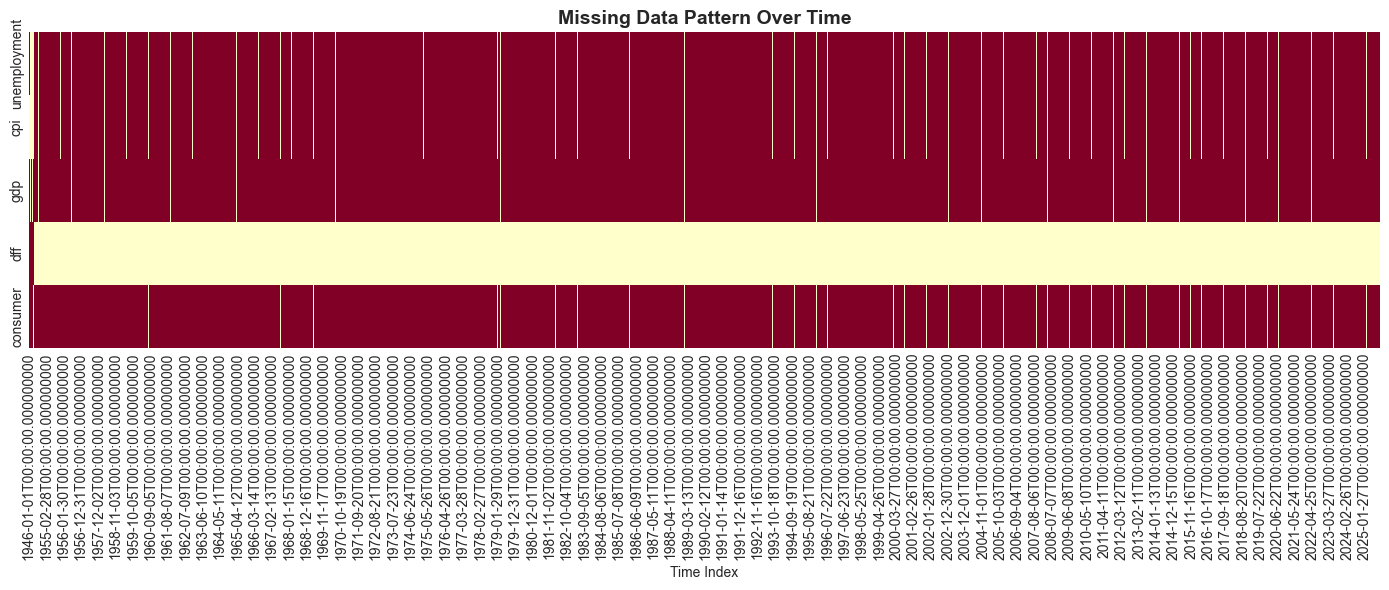

In [8]:
print("\n" + "="*60)
print("📊 STEP 2: MISSING DATA ANALYSIS")
print("-"*60)

def analyze_missing_data(df):
    """
    Detailed missing data analysis
    """
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'Missing_Count': missing,
        'Percentage': missing_pct
    }).sort_values('Percentage', ascending=False)
    
    print("\n🔴 Missing Data Summary:")
    print(missing_df[missing_df['Missing_Count'] > 0])
    
    if missing_df['Missing_Count'].sum() == 0:
        print("✅ No missing values found!")
    else:
        # Visualize missing data
        plt.figure(figsize=(12, 6))
        missing_df[missing_df['Missing_Count'] > 0]['Percentage'].plot(
            kind='barh', color='coral'
        )
        plt.xlabel('Percentage Missing (%)', fontsize=12)
        plt.title('Missing Data by Indicator', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
        
        # Missing data pattern over time
        if missing.sum() > 0:
            plt.figure(figsize=(14, 6))
            sns.heatmap(df.isnull().T, cbar=False, cmap='YlOrRd', yticklabels=True)
            plt.title('Missing Data Pattern Over Time', fontsize=14, fontweight='bold')
            plt.xlabel('Time Index')
            plt.tight_layout()
            plt.show()

analyze_missing_data(economic_data)

In [9]:
# ============================================
# STEP 3: DESCRIPTIVE STATISTICS
# ============================================
print("\n" + "="*60)
print("📊 STEP 3: DESCRIPTIVE STATISTICS")
print("-"*60)

def descriptive_stats(df):
    """
    Comprehensive descriptive statistics
    """
    print("\n📈 Summary Statistics:")
    stats_df = df.describe().T
    stats_df['range'] = stats_df['max'] - stats_df['min']
    stats_df['coef_var'] = (stats_df['std'] / stats_df['mean']) * 100
    print(stats_df)
    
    print("\n📊 Additional Statistics:")
    additional_stats = pd.DataFrame({
        'Median': df.median(),
        'Mode': df.mode().iloc[0],
        'Skewness': df.skew(),
        'Kurtosis': df.kurtosis()
    })
    print(additional_stats)
    
    return stats_df, additional_stats

summary_stats, additional_stats = descriptive_stats(economic_data)


📊 STEP 3: DESCRIPTIVE STATISTICS
------------------------------------------------------------

📈 Summary Statistics:
                count         mean          std      min      25%       50%  \
unemployment    932.0     5.670386     1.707418    2.500    4.300     5.500   
cpi             945.0   123.421543    88.823908   21.480   32.750   109.500   
gdp             314.0  7600.847631  7972.380608  243.164  823.054  4526.617   
dff           26073.0     4.605358     3.562248    0.040    1.910     4.330   
consumer        665.0    84.898947    13.217724   50.000   74.500    88.600   

                     75%        max      range    coef_var  
unemployment      6.7000     14.800     12.300   30.111144  
cpi             199.3000    324.368    302.888   71.967913  
gdp           13278.8135  30485.729  30242.565  104.888047  
dff               6.1300     22.360     22.320   77.350066  
consumer         94.7000    112.000     62.000   15.568773  

📊 Additional Statistics:
               


📊 STEP 4: TIME SERIES VISUALIZATION
------------------------------------------------------------


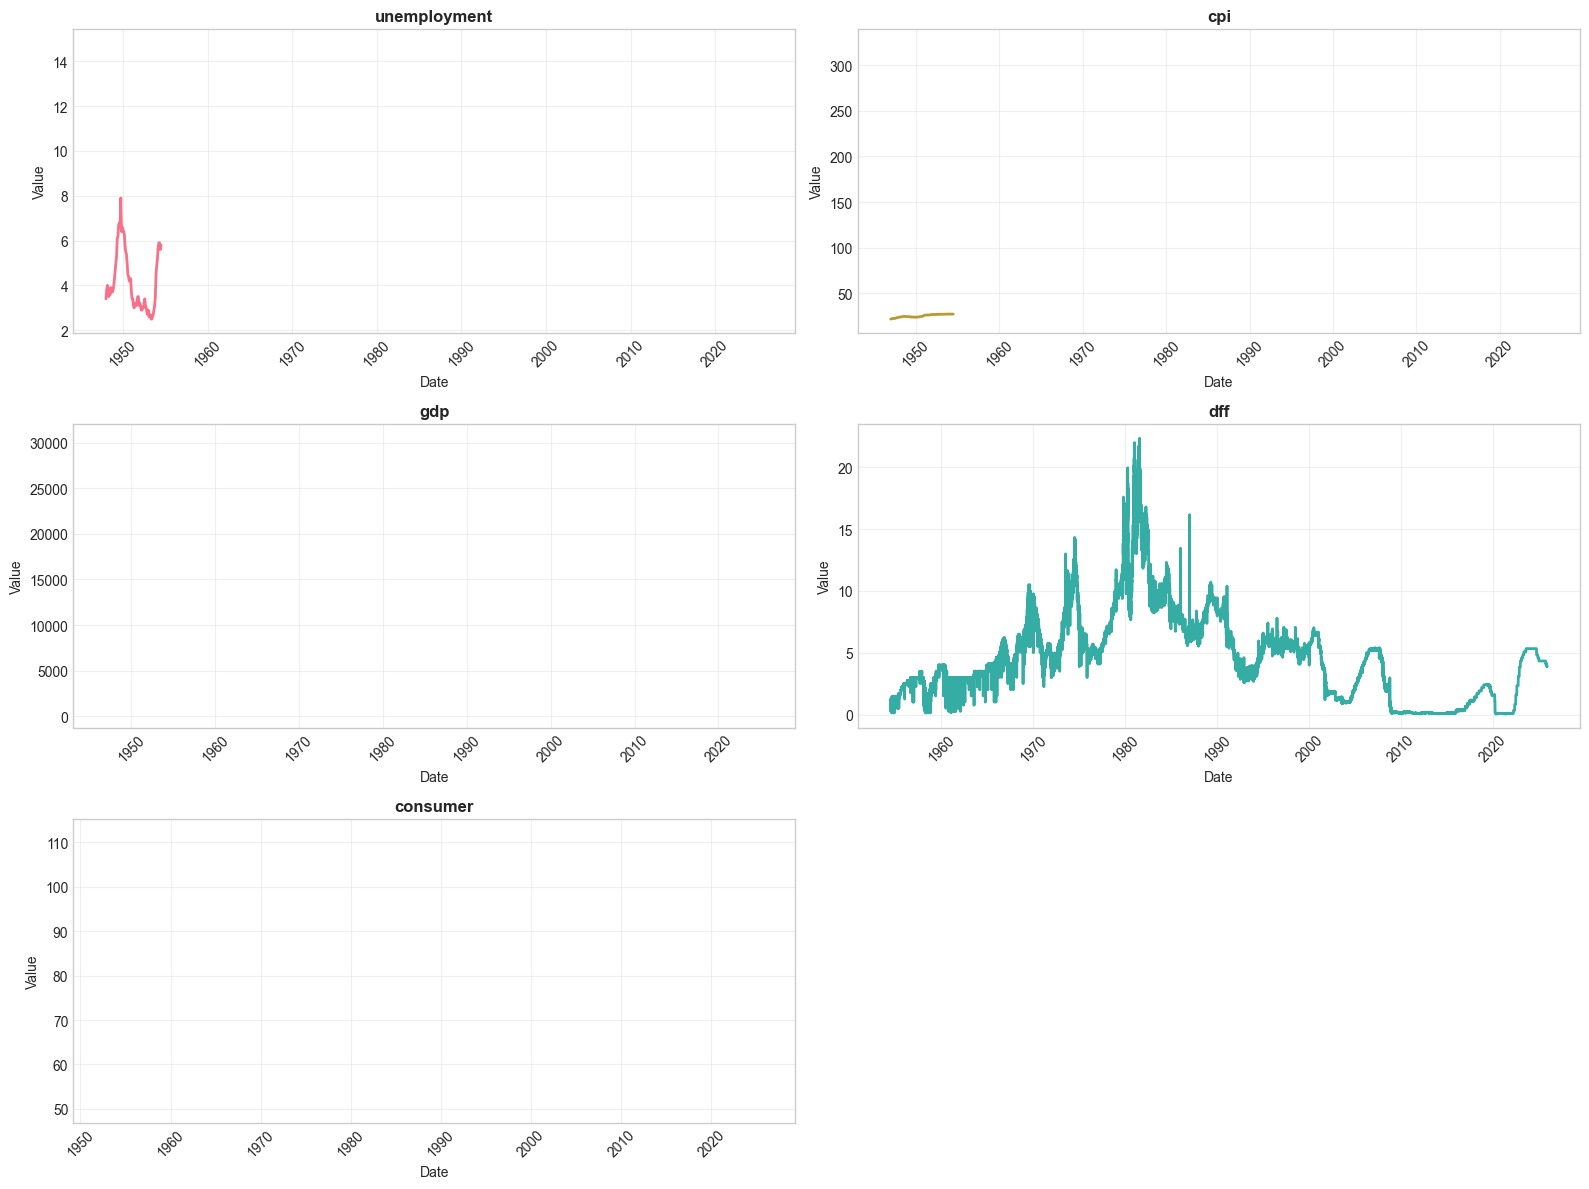

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [10]:
# STEP 4: TIME SERIES VISUALIZATION
# ============================================
print("\n" + "="*60)
print("📊 STEP 4: TIME SERIES VISUALIZATION")
print("-"*60)

def plot_all_indicators(df):
    """
    Plot all indicators in a grid
    """
    n_cols = 2
    n_rows = (len(df.columns) + 1) // 2
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
    axes = axes.flatten()
    
    for idx, col in enumerate(df.columns):
        axes[idx].plot(df.index, df[col], linewidth=2, color=f'C{idx}')
        axes[idx].set_title(col, fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Date')
        axes[idx].set_ylabel('Value')
        axes[idx].grid(True, alpha=0.3)
        axes[idx].tick_params(axis='x', rotation=45)
    
    # Remove empty subplots
    for idx in range(len(df.columns), len(axes)):
        fig.delaxes(axes[idx])
    
    plt.tight_layout()
    plt.show()

plot_all_indicators(economic_data)

# Interactive version with Plotly
def plot_interactive_indicators(df):
    """
    Create interactive Plotly visualization
    """
    fig = go.Figure()
    
    for col in df.columns:
        fig.add_trace(go.Scatter(
            x=df.index,
            y=df[col],
            name=col,
            mode='lines',
            line=dict(width=2)
        ))
    
    fig.update_layout(
        title='Economic Indicators Over Time (Interactive)',
        xaxis_title='Date',
        yaxis_title='Value',
        hovermode='x unified',
        height=600,
        template='plotly_white'
    )
    
    fig.show()

plot_interactive_indicators(economic_data)



📊 STEP 5: DISTRIBUTION ANALYSIS
------------------------------------------------------------


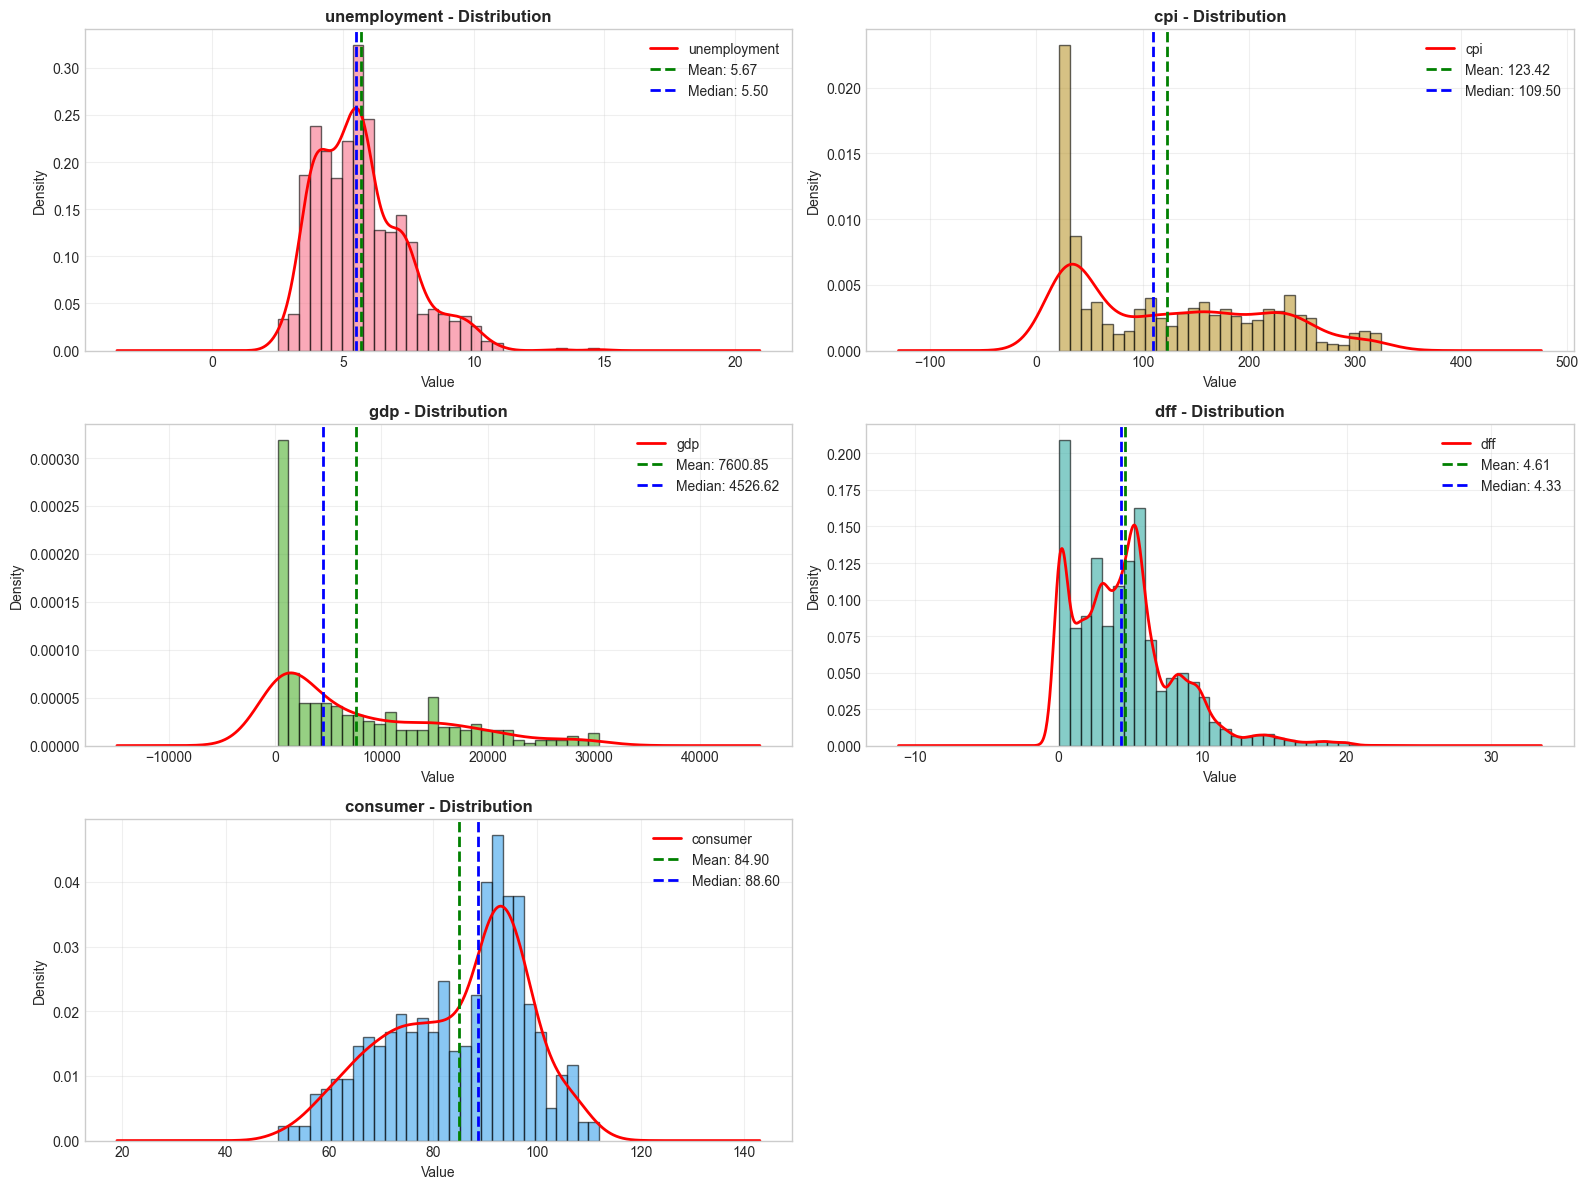

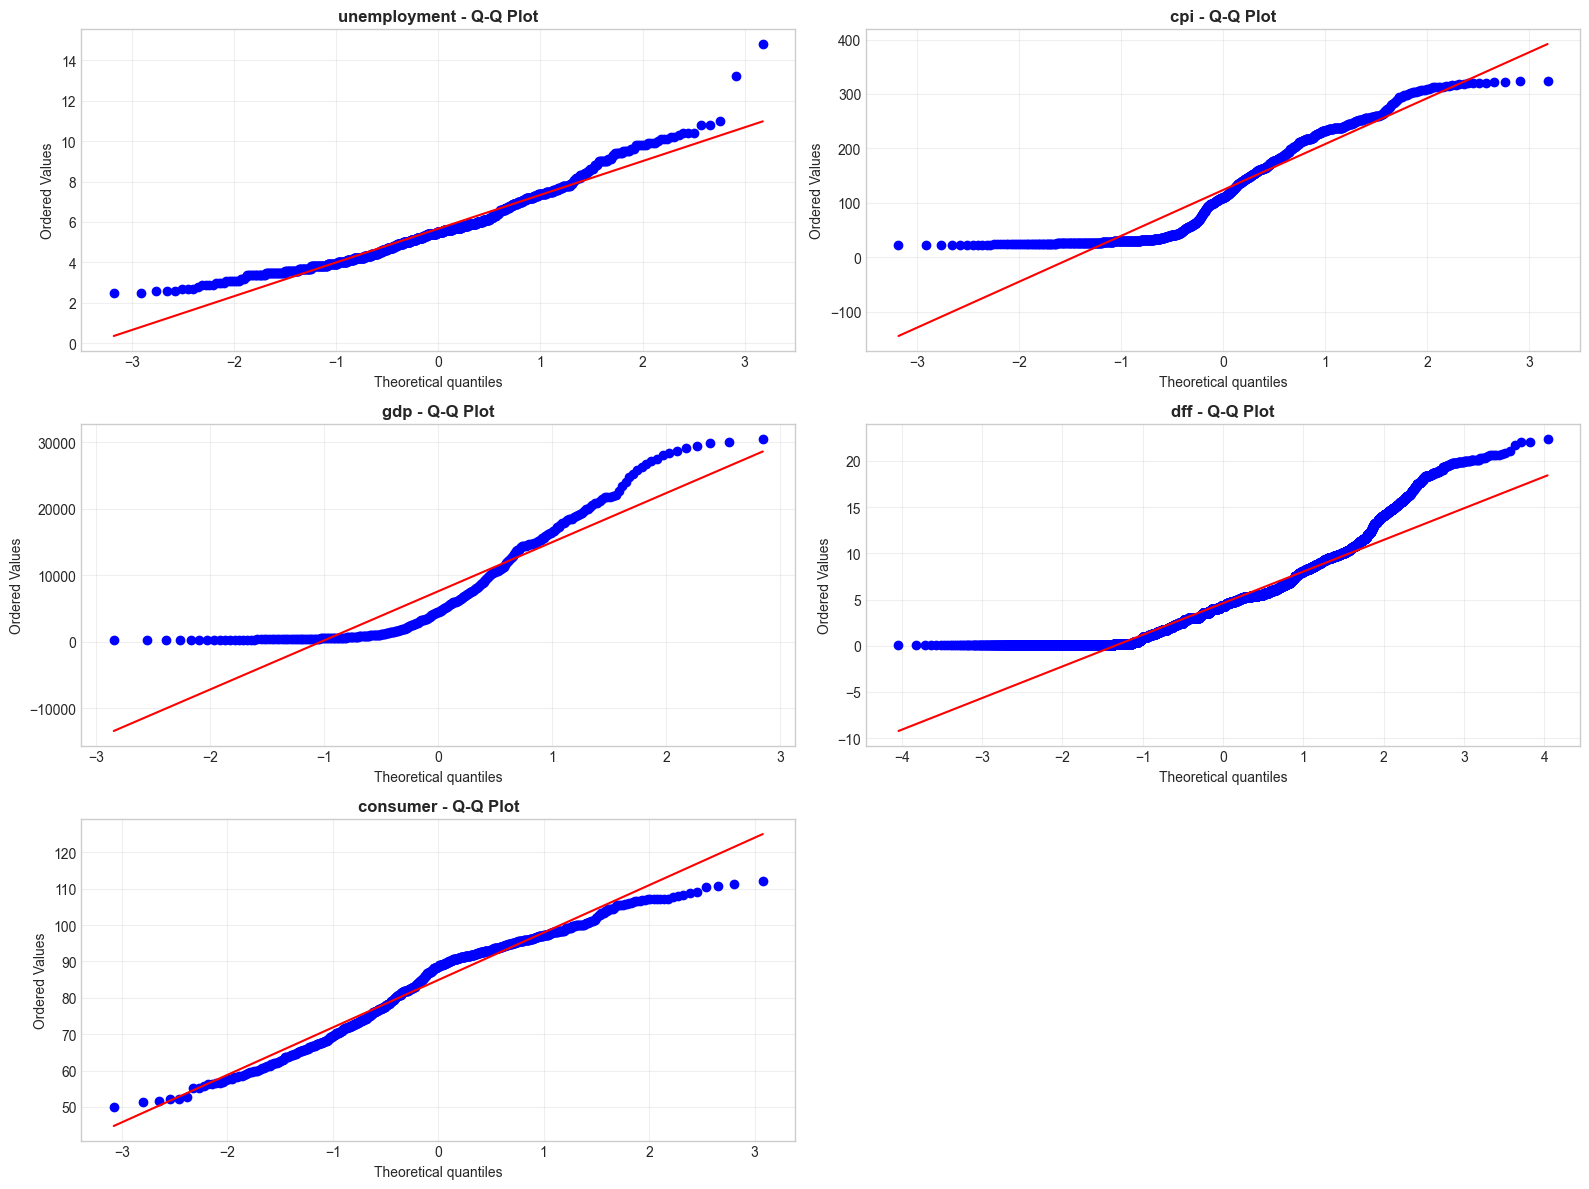

In [ ]:
# STEP 5: DISTRIBUTION ANALYSIS
# ============================================
print("\n" + "="*60)
print("📊 STEP 5: DISTRIBUTION ANALYSIS")
print("-"*60)

def analyze_distributions(df):
    """
    Analyze distribution of each indicator
    """
    n_cols = 2
    n_rows = (len(df.columns) + 1) // 2
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
    axes = axes.flatten()
    
    for idx, col in enumerate(df.columns):
        # Histogram with KDE
        axes[idx].hist(df[col].dropna(), bins=30, alpha=0.6, 
                       color=f'C{idx}', edgecolor='black', density=True)
        
        # KDE overlay
        df[col].dropna().plot(kind='kde', ax=axes[idx], linewidth=2, color='red')
        
        axes[idx].set_title(f'{col} - Distribution', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Value')
        axes[idx].set_ylabel('Density')
        axes[idx].grid(True, alpha=0.3)
        
        # Add mean and median lines
        mean_val = df[col].mean()
        median_val = df[col].median()
        axes[idx].axvline(mean_val, color='green', linestyle='--', 
                          linewidth=2, label=f'Mean: {mean_val:.2f}')
        axes[idx].axvline(median_val, color='blue', linestyle='--', 
                          linewidth=2, label=f'Median: {median_val:.2f}')
        axes[idx].legend()
    
    # Remove empty subplots
    for idx in range(len(df.columns), len(axes)):
        fig.delaxes(axes[idx])
    
    plt.tight_layout()
    plt.show()

analyze_distributions(economic_data)

# Q-Q plots for normality check
def qq_plots(df):
    """
    Q-Q plots to check normality
    """
    n_cols = 2
    n_rows = (len(df.columns) + 1) // 2
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
    axes = axes.flatten()
    
    for idx, col in enumerate(df.columns):
        stats.probplot(df[col].dropna(), dist="norm", plot=axes[idx])
        axes[idx].set_title(f'{col} - Q-Q Plot', fontsize=12, fontweight='bold')
        axes[idx].grid(True, alpha=0.3)
    
    # Remove empty subplots
    for idx in range(len(df.columns), len(axes)):
        fig.delaxes(axes[idx])
    
    plt.tight_layout()
    plt.show()

qq_plots(economic_data)


📊 STEP 6: CORRELATION ANALYSIS
------------------------------------------------------------

📊 Correlation Matrix:
              unemployment       cpi       gdp       dff  consumer
unemployment      1.000000  0.062259 -0.020820  0.083189 -0.348427
cpi               0.062259  1.000000  0.975262 -0.373878 -0.214739
gdp              -0.020820  0.975262  1.000000 -0.412933 -0.206759
dff               0.083189 -0.373878 -0.412933  1.000000 -0.079252
consumer         -0.348427 -0.214739 -0.206759 -0.079252  1.000000


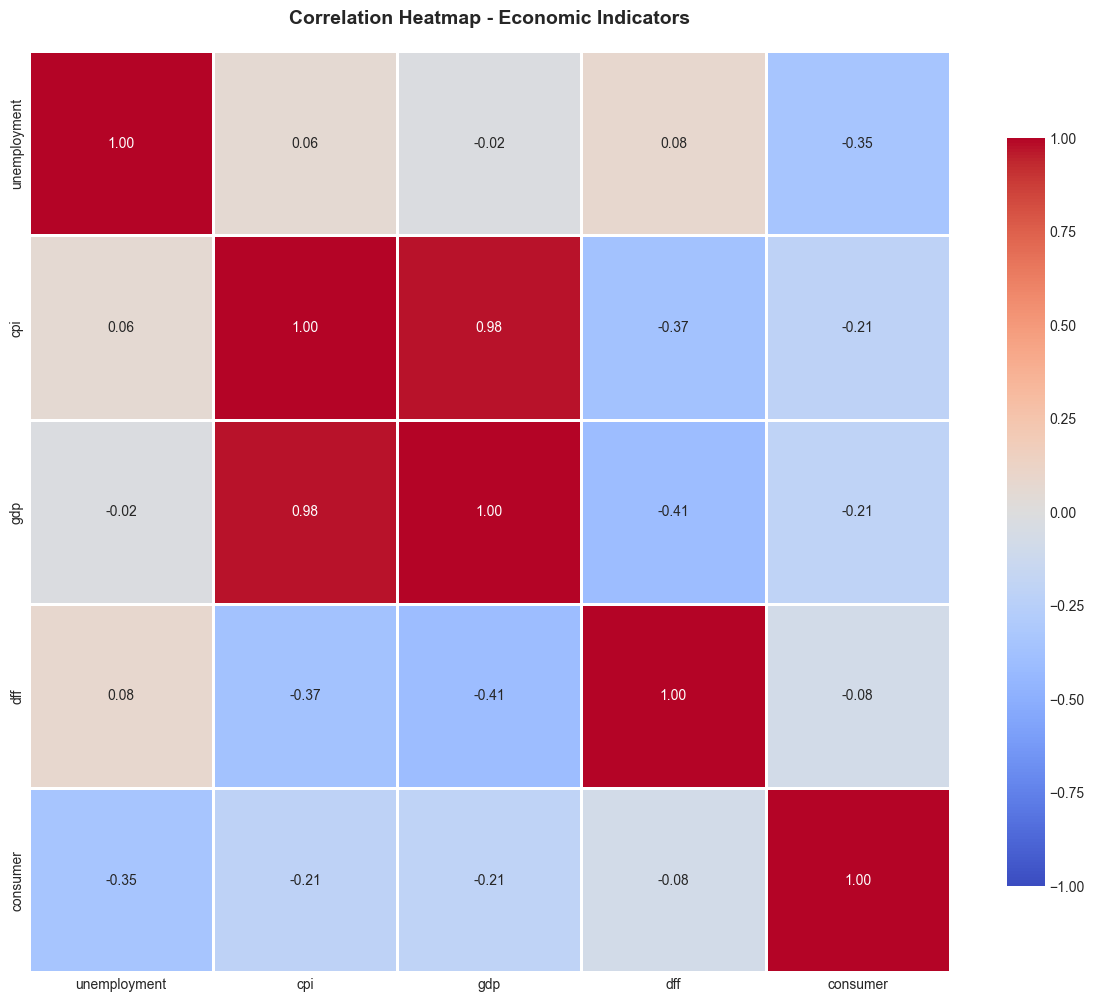


🔥 Strongest Positive Correlations:
gdp           cpi             0.975262
cpi           gdp             0.975262
unemployment  dff             0.083189
dff           unemployment    0.083189
unemployment  cpi             0.062259
cpi           unemployment    0.062259
unemployment  gdp            -0.020820
gdp           unemployment   -0.020820
dff           consumer       -0.079252
consumer      dff            -0.079252
dtype: float64

❄️  Strongest Negative Correlations:
gdp           consumer       -0.206759
consumer      gdp            -0.206759
cpi           consumer       -0.214739
consumer      cpi            -0.214739
unemployment  consumer       -0.348427
consumer      unemployment   -0.348427
cpi           dff            -0.373878
dff           cpi            -0.373878
              gdp            -0.412933
gdp           dff            -0.412933
dtype: float64


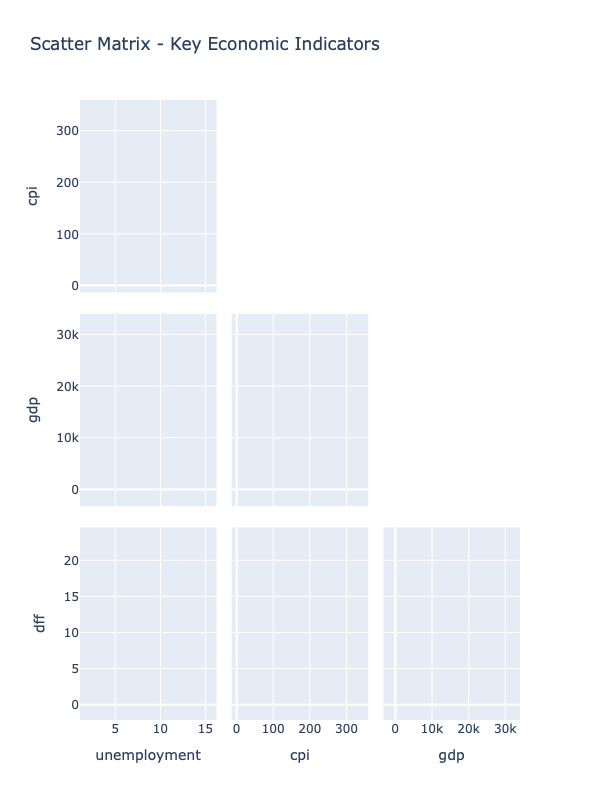

In [ ]:
# STEP 6: CORRELATION ANALYSIS
# ============================================
print("\n" + "="*60)
print("📊 STEP 6: CORRELATION ANALYSIS")
print("-"*60)

def correlation_analysis(df):
    """
    Comprehensive correlation analysis
    """
    # Compute correlation matrix
    corr_matrix = df.corr()
    
    print("\n📊 Correlation Matrix:")
    print(corr_matrix)
    
    # Heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=1, cbar_kws={"shrink": 0.8},
                fmt='.2f', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap - Economic Indicators', 
              fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    # Find strongest correlations
    print("\n🔥 Strongest Positive Correlations:")
    corr_pairs = corr_matrix.unstack()
    corr_pairs = corr_pairs[corr_pairs < 1.0].sort_values(ascending=False)
    print(corr_pairs.head(10))
    
    print("\n❄️  Strongest Negative Correlations:")
    print(corr_pairs.tail(10))
    
    return corr_matrix

corr_matrix = correlation_analysis(economic_data)

# Scatter plots for key relationships
def scatter_matrix_plot(df):
    """
    Create scatter plot matrix
    """
    # Select subset of columns for readability (adjust as needed)
    cols_to_plot = df.columns[:4]  # First 4 indicators
    
    fig = px.scatter_matrix(
        df[cols_to_plot],
        dimensions=cols_to_plot,
        title='Scatter Matrix - Key Economic Indicators',
        height=800
    )
    fig.update_traces(diagonal_visible=False, showupperhalf=False)
    fig.show()

scatter_matrix_plot(economic_data)

In [ ]:
# STEP 7: TREND ANALYSIS
# ============================================
print("\n" + "="*60)
print("📊 STEP 7: TREND ANALYSIS")
print("-"*60)

def analyze_trends(df, column):
    """
    Analyze trends with moving averages
    """
    plt.figure(figsize=(14, 8))
    
    # Original data
    plt.plot(df.index, df[column], label='Original', linewidth=1.5, alpha=0.7)
    
    # Moving averages
    ma_3m = df[column].rolling(window=3).mean()
    ma_6m = df[column].rolling(window=6).mean()
    ma_12m = df[column].rolling(window=12).mean()
    
    plt.plot(df.index, ma_3m, label='3-Month MA', linewidth=2)
    plt.plot(df.index, ma_6m, label='6-Month MA', linewidth=2)
    plt.plot(df.index, ma_12m, label='12-Month MA', linewidth=2)
    
    plt.title(f'{column} - Trend Analysis with Moving Averages', 
              fontsize=14, fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Calculate rate of change
    df[f'{column}_pct_change'] = df[column].pct_change() * 100
    
    plt.figure(figsize=(14, 6))
    plt.plot(df.index, df[f'{column}_pct_change'], linewidth=1.5)
    plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
    plt.title(f'{column} - Percentage Change Over Time', 
              fontsize=14, fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Percentage Change (%)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Example: Analyze unemployment rate trends
if 'Unemployment Rate' in economic_data.columns:
    analyze_trends(economic_data, 'Unemployment Rate')


📊 STEP 7: TREND ANALYSIS
------------------------------------------------------------


In [ ]:
# STEP 8: SEASONALITY & DECOMPOSITION
# ============================================
print("\n" + "="*60)
print("📊 STEP 8: SEASONALITY & DECOMPOSITION")
print("-"*60)

def decompose_time_series(df, column, freq=12):
    """
    Decompose time series into trend, seasonal, and residual components
    """
    # Remove missing values
    series = df[column].dropna()
    
    # Perform decomposition
    decomposition = seasonal_decompose(series, model='additive', period=freq)
    
    # Plot
    fig, axes = plt.subplots(4, 1, figsize=(14, 12))
    
    decomposition.observed.plot(ax=axes[0], title='Original', color='blue')
    axes[0].set_ylabel('Observed')
    axes[0].grid(True, alpha=0.3)
    
    decomposition.trend.plot(ax=axes[1], title='Trend', color='green')
    axes[1].set_ylabel('Trend')
    axes[1].grid(True, alpha=0.3)
    
    decomposition.seasonal.plot(ax=axes[2], title='Seasonality', color='orange')
    axes[2].set_ylabel('Seasonal')
    axes[2].grid(True, alpha=0.3)
    
    decomposition.resid.plot(ax=axes[3], title='Residuals', color='red')
    axes[3].set_ylabel('Residual')
    axes[3].grid(True, alpha=0.3)
    
    plt.suptitle(f'Time Series Decomposition - {column}', 
                 fontsize=16, fontweight='bold', y=1.001)
    plt.tight_layout()
    plt.show()
    
    return decomposition

# Example: Decompose unemployment rate
if 'Unemployment Rate' in economic_data.columns:
    decomp = decompose_time_series(economic_data, 'Unemployment Rate')


📊 STEP 8: SEASONALITY & DECOMPOSITION
------------------------------------------------------------



📊 STEP 9: STATIONARITY TESTING (ADF Test)
------------------------------------------------------------

🔬 ADF Test Results for unemployment:
   ADF Statistic: -3.933882
   p-value: 0.001799
   Critical Values:
      1%: -3.437
      5%: -2.865
      10%: -2.568
   ✅ STATIONARY (p < 0.05)
   → The series does not have a unit root


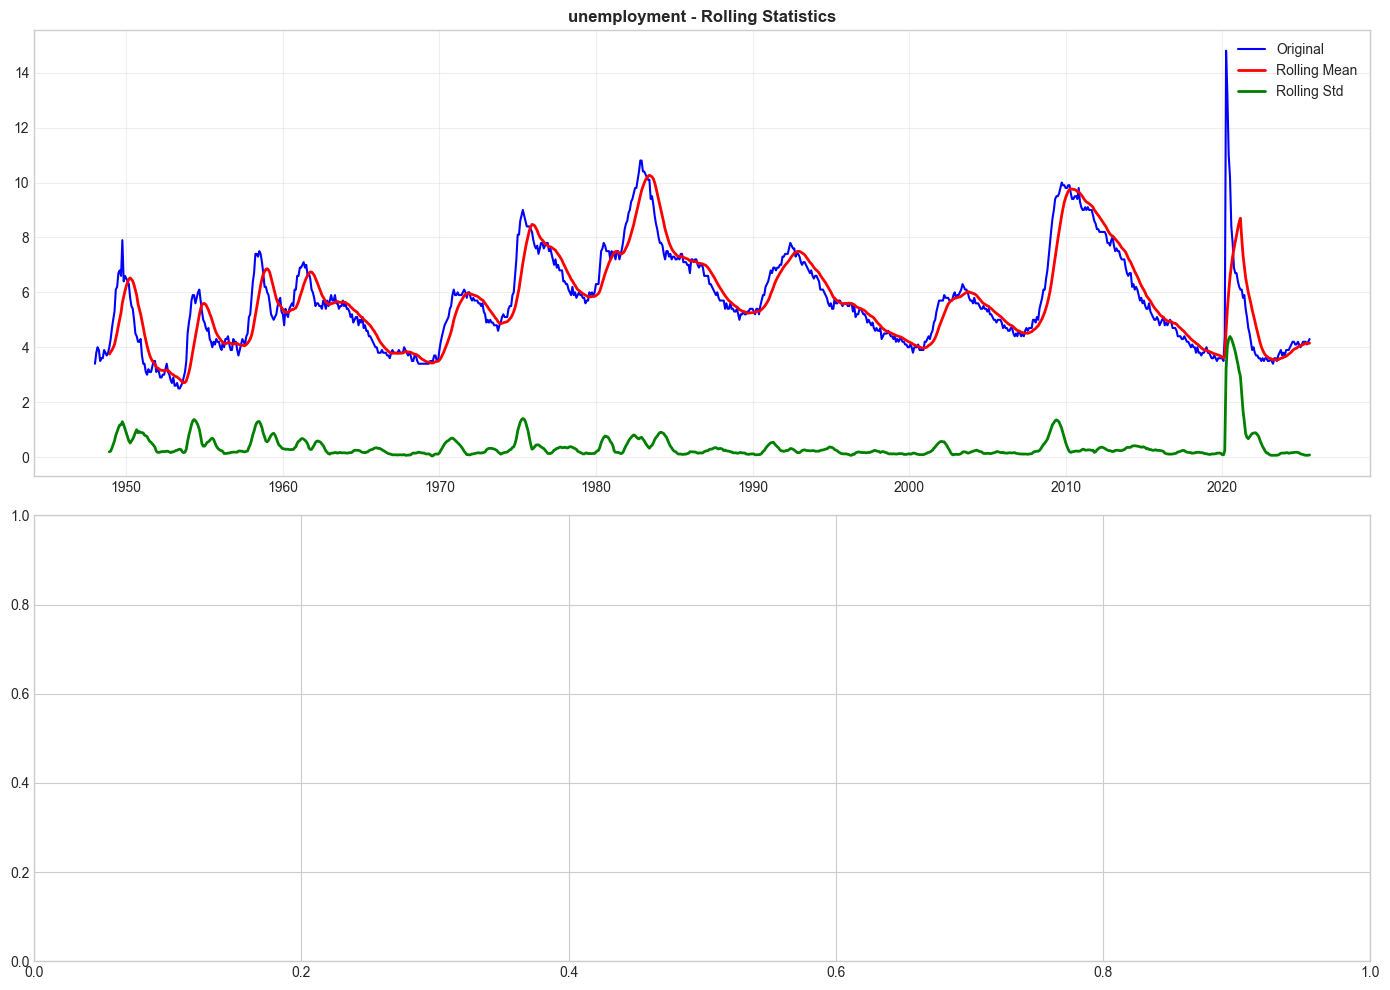


🔬 ADF Test Results for cpi:
   ADF Statistic: 2.810093
   p-value: 1.000000
   Critical Values:
      1%: -3.437
      5%: -2.865
      10%: -2.568
   ❌ NON-STATIONARY (p >= 0.05)
   → The series has a unit root, consider differencing

   After First Differencing:
   p-value: 0.004068
   ✅ NOW STATIONARY


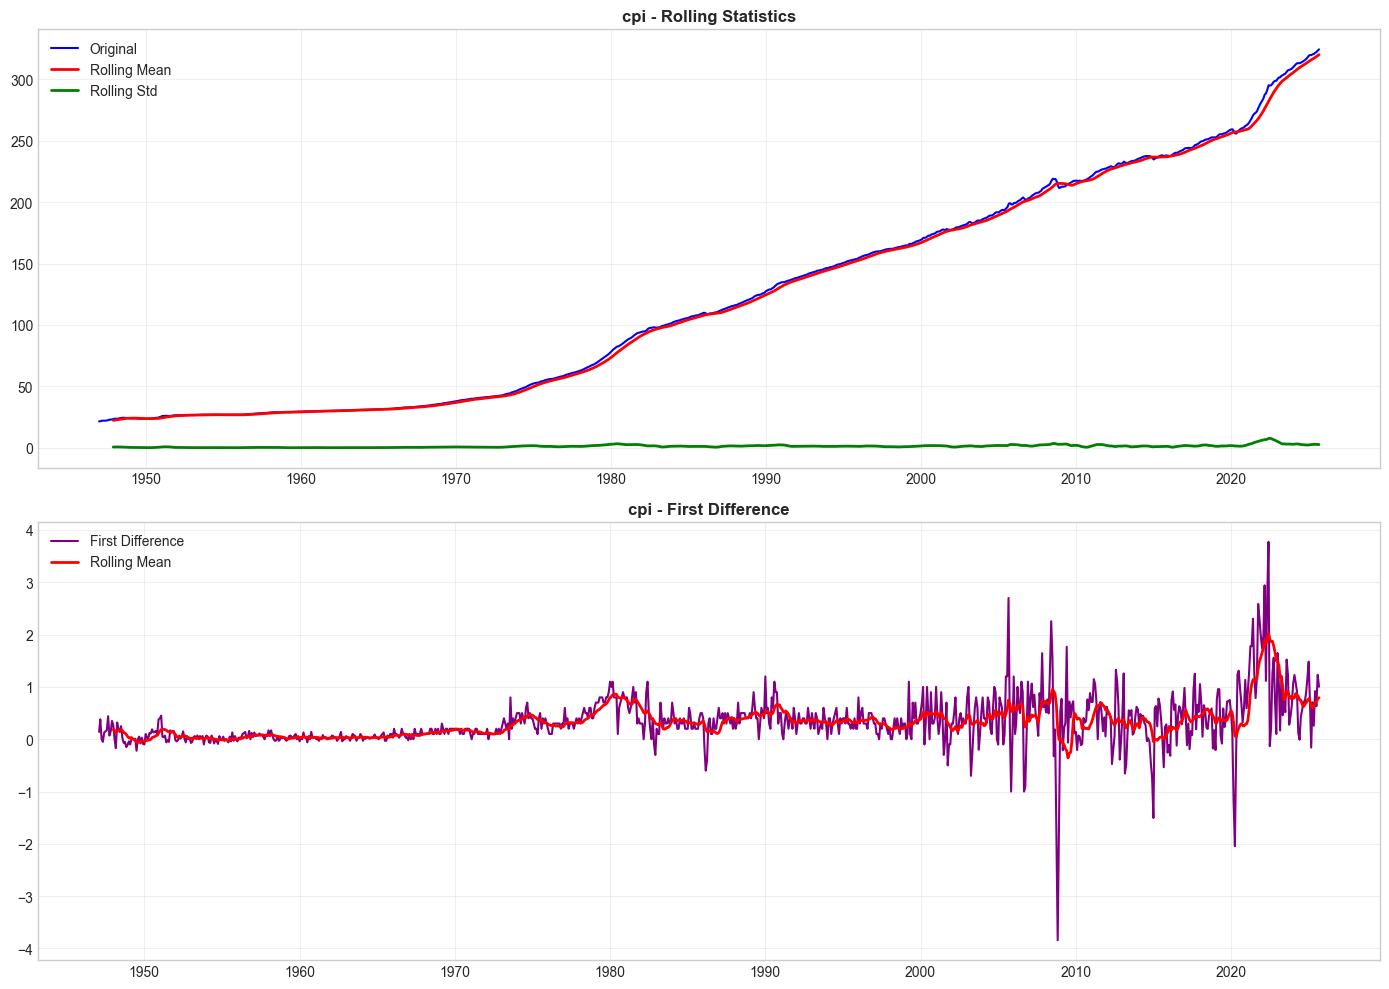


🔬 ADF Test Results for gdp:
   ADF Statistic: 9.420779
   p-value: 1.000000
   Critical Values:
      1%: -3.451
      5%: -2.871
      10%: -2.572
   ❌ NON-STATIONARY (p >= 0.05)
   → The series has a unit root, consider differencing

   After First Differencing:
   p-value: 0.003010
   ✅ NOW STATIONARY


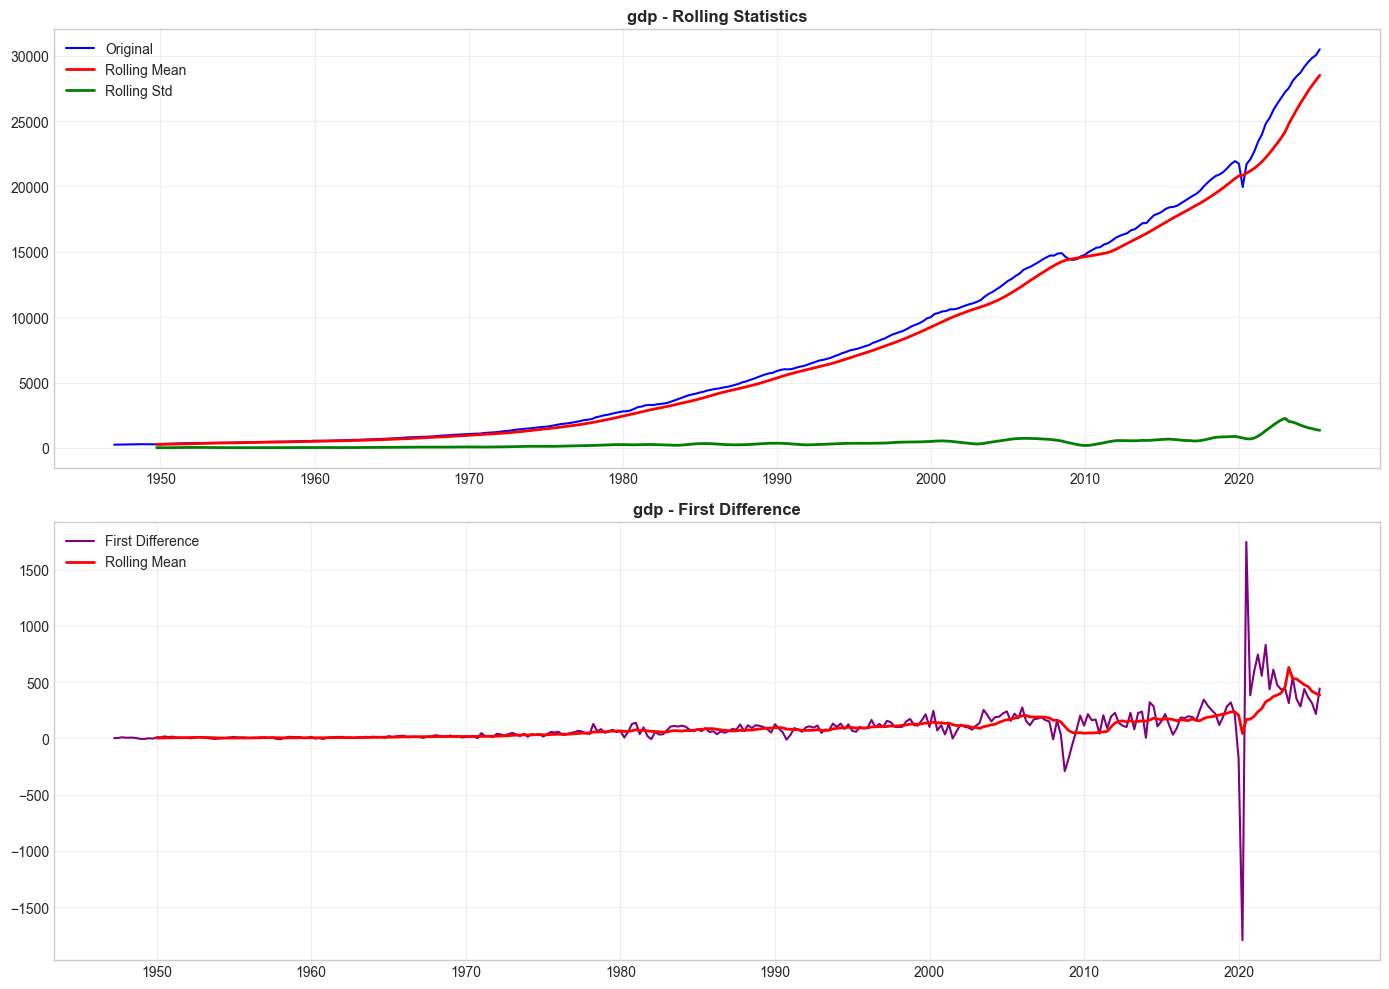


🔬 ADF Test Results for dff:
   ADF Statistic: -2.869798
   p-value: 0.048974
   Critical Values:
      1%: -3.431
      5%: -2.862
      10%: -2.567
   ✅ STATIONARY (p < 0.05)
   → The series does not have a unit root


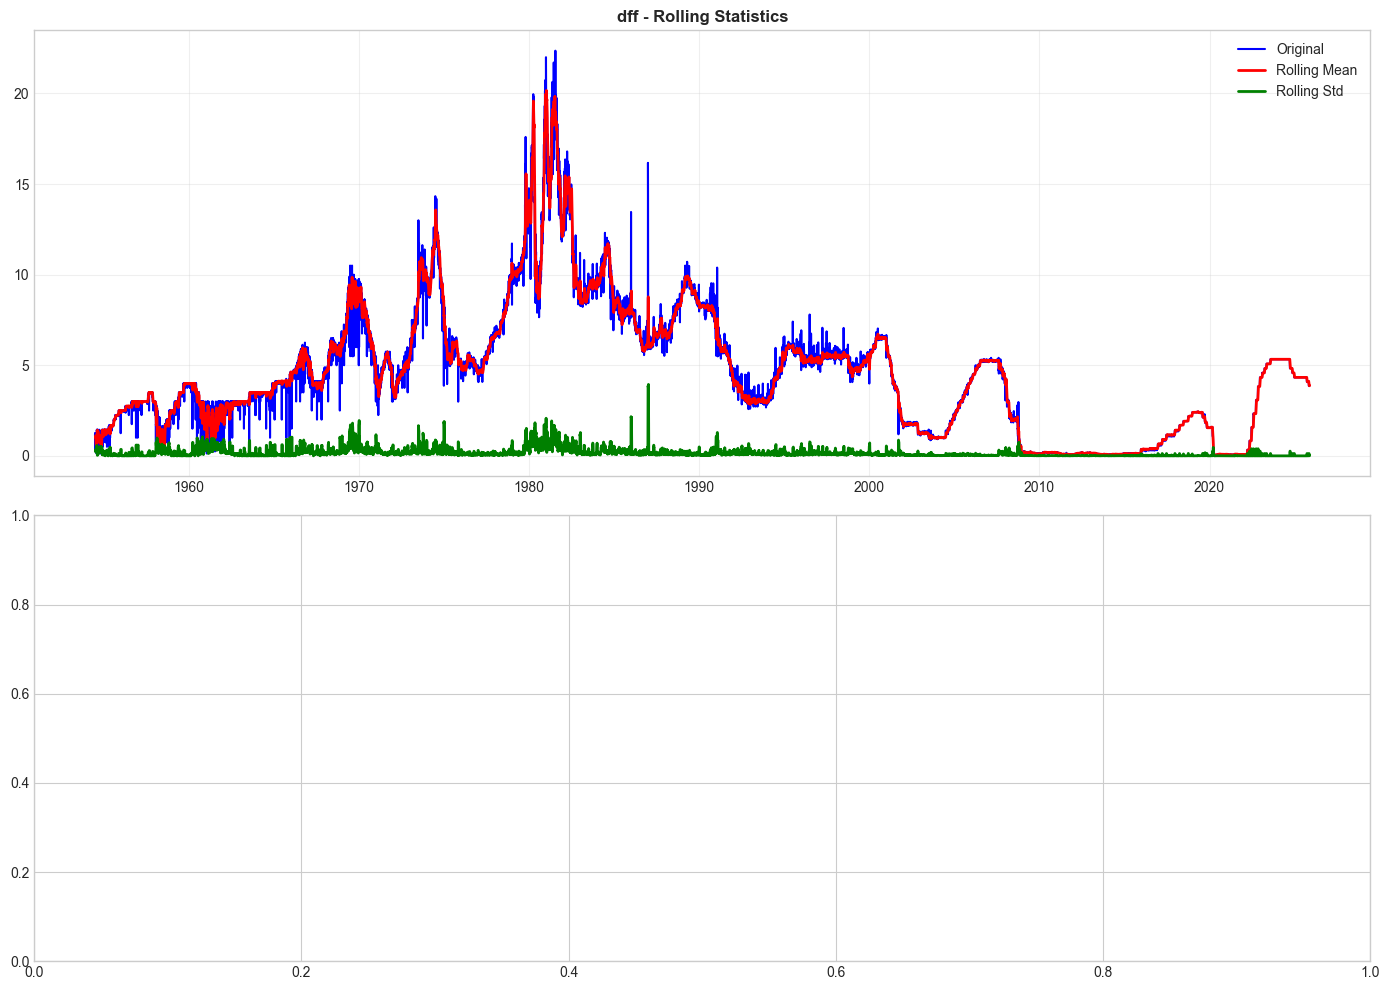


🔬 ADF Test Results for consumer:
   ADF Statistic: -2.570970
   p-value: 0.099147
   Critical Values:
      1%: -3.440
      5%: -2.866
      10%: -2.569
   ❌ NON-STATIONARY (p >= 0.05)
   → The series has a unit root, consider differencing

   After First Differencing:
   p-value: 0.000000
   ✅ NOW STATIONARY


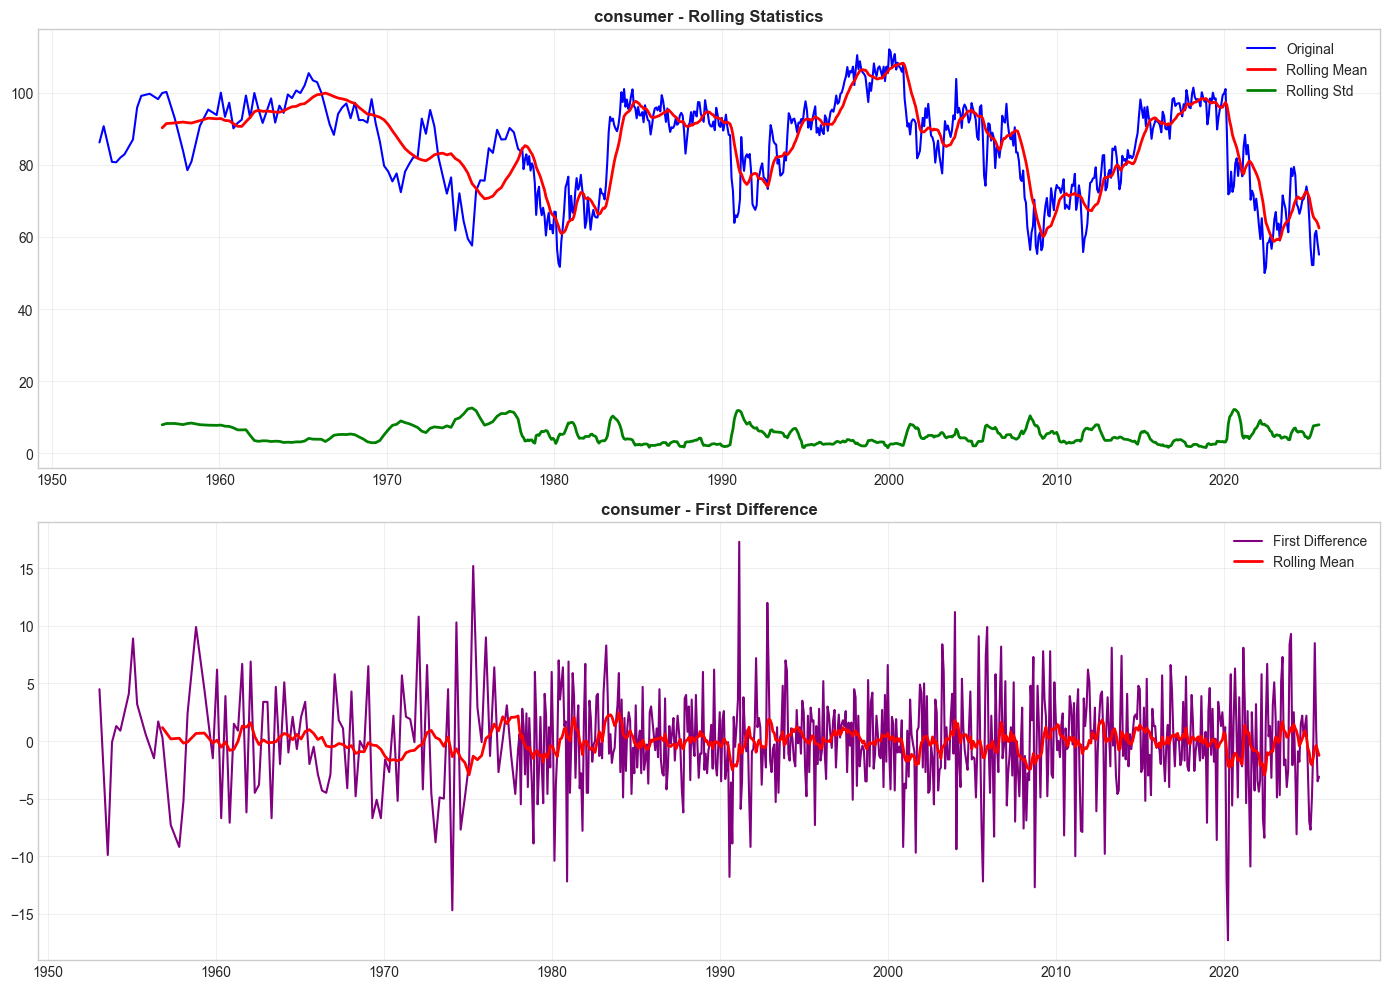

In [ ]:
# STEP 9: STATIONARITY TESTING
# ============================================
print("\n" + "="*60)
print("📊 STEP 9: STATIONARITY TESTING (ADF Test)")
print("-"*60)

def test_stationarity(df, column):
    """
    Augmented Dickey-Fuller test for stationarity
    """
    series = df[column].dropna()
    
    # Perform ADF test
    result = adfuller(series)
    
    print(f"\n🔬 ADF Test Results for {column}:")
    print(f"   ADF Statistic: {result[0]:.6f}")
    print(f"   p-value: {result[1]:.6f}")
    print(f"   Critical Values:")
    for key, value in result[4].items():
        print(f"      {key}: {value:.3f}")
    
    # Interpretation
    if result[1] < 0.05:
        print(f"   ✅ STATIONARY (p < 0.05)")
        print(f"   → The series does not have a unit root")
    else:
        print(f"   ❌ NON-STATIONARY (p >= 0.05)")
        print(f"   → The series has a unit root, consider differencing")
    
    # Plot rolling statistics
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    
    # Original series
    axes[0].plot(series.index, series, label='Original', color='blue')
    axes[0].plot(series.index, series.rolling(window=12).mean(), 
                 label='Rolling Mean', color='red', linewidth=2)
    axes[0].plot(series.index, series.rolling(window=12).std(), 
                 label='Rolling Std', color='green', linewidth=2)
    axes[0].set_title(f'{column} - Rolling Statistics', fontweight='bold')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # First difference (if non-stationary)
    if result[1] >= 0.05:
        diff_series = series.diff().dropna()
        axes[1].plot(diff_series.index, diff_series, label='First Difference', color='purple')
        axes[1].plot(diff_series.index, diff_series.rolling(window=12).mean(), 
                     label='Rolling Mean', color='red', linewidth=2)
        axes[1].set_title(f'{column} - First Difference', fontweight='bold')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
        
        # Test differenced series
        diff_result = adfuller(diff_series)
        print(f"\n   After First Differencing:")
        print(f"   p-value: {diff_result[1]:.6f}")
        if diff_result[1] < 0.05:
            print(f"   ✅ NOW STATIONARY")
    
    plt.tight_layout()
    plt.show()
    
    return result

# Test all indicators
stationarity_results = {}
for col in economic_data.columns:
    stationarity_results[col] = test_stationarity(economic_data, col)

In [ ]:
# STEP 10: AUTOCORRELATION ANALYSIS
# ============================================
print("\n" + "="*60)
print("📊 STEP 10: AUTOCORRELATION ANALYSIS")
print("-"*60)

def plot_acf_pacf(df, column, lags=40):
    """
    Plot ACF and PACF for time series
    """
    series = df[column].dropna()
    
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    
    # ACF
    plot_acf(series, lags=lags, ax=axes[0])
    axes[0].set_title(f'Autocorrelation Function (ACF) - {column}', 
                      fontweight='bold')
    axes[0].grid(True, alpha=0.3)
    
    # PACF
    plot_pacf(series, lags=lags, ax=axes[1])
    axes[1].set_title(f'Partial Autocorrelation Function (PACF) - {column}', 
                      fontweight='bold')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Example: ACF/PACF for unemployment rate
if 'Unemployment Rate' in economic_data.columns:
    plot_acf_pacf(economic_data, 'Unemployment Rate')



📊 STEP 10: AUTOCORRELATION ANALYSIS
------------------------------------------------------------



📊 STEP 11: OUTLIER DETECTION
------------------------------------------------------------

📊 Outlier Analysis for unemployment:
   IQR Method: 8 outliers detected
   Z-score Method (|z| > 3): 5 outliers detected

   Outlier dates (IQR):
      1982-10-01: 10.40
      1982-11-01: 10.80
      1982-12-01: 10.80
      1983-01-01: 10.40
      1983-02-01: 10.40
      2020-04-01: 14.80
      2020-05-01: 13.20
      2020-06-01: 11.00


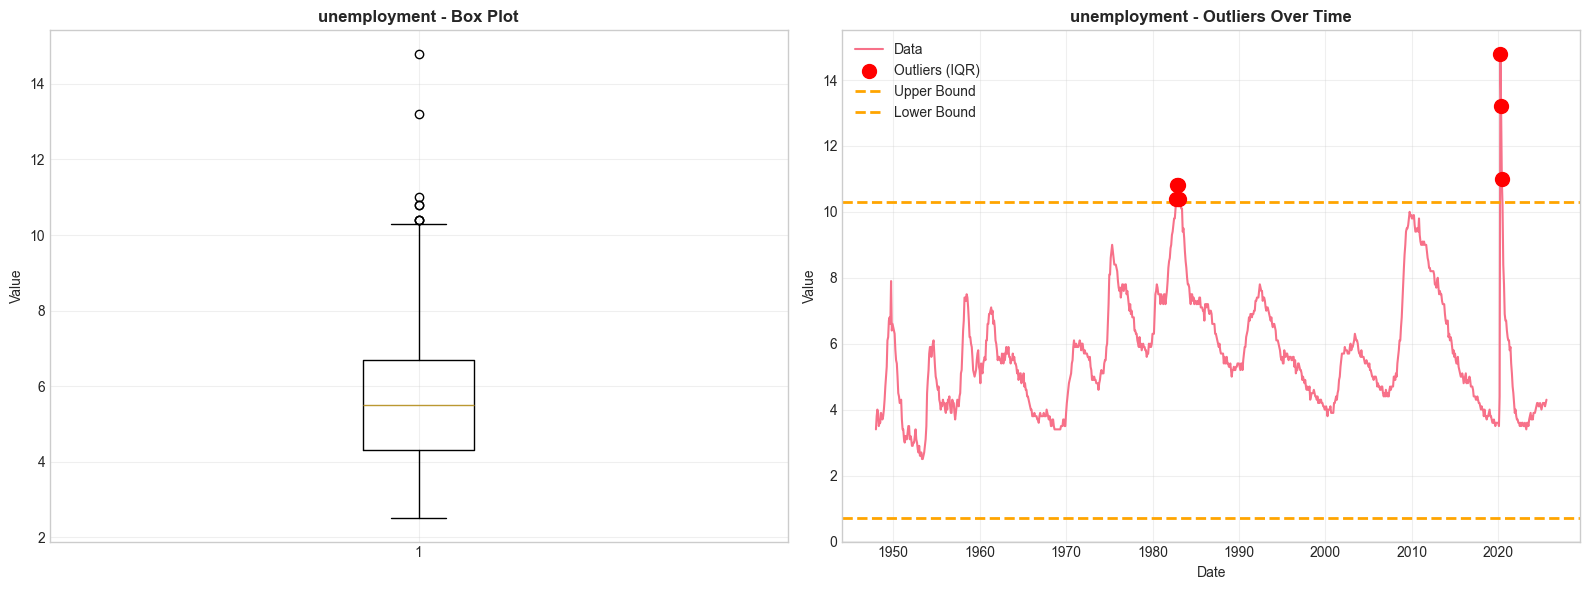


📊 Outlier Analysis for cpi:
   IQR Method: 0 outliers detected
   Z-score Method (|z| > 3): 0 outliers detected


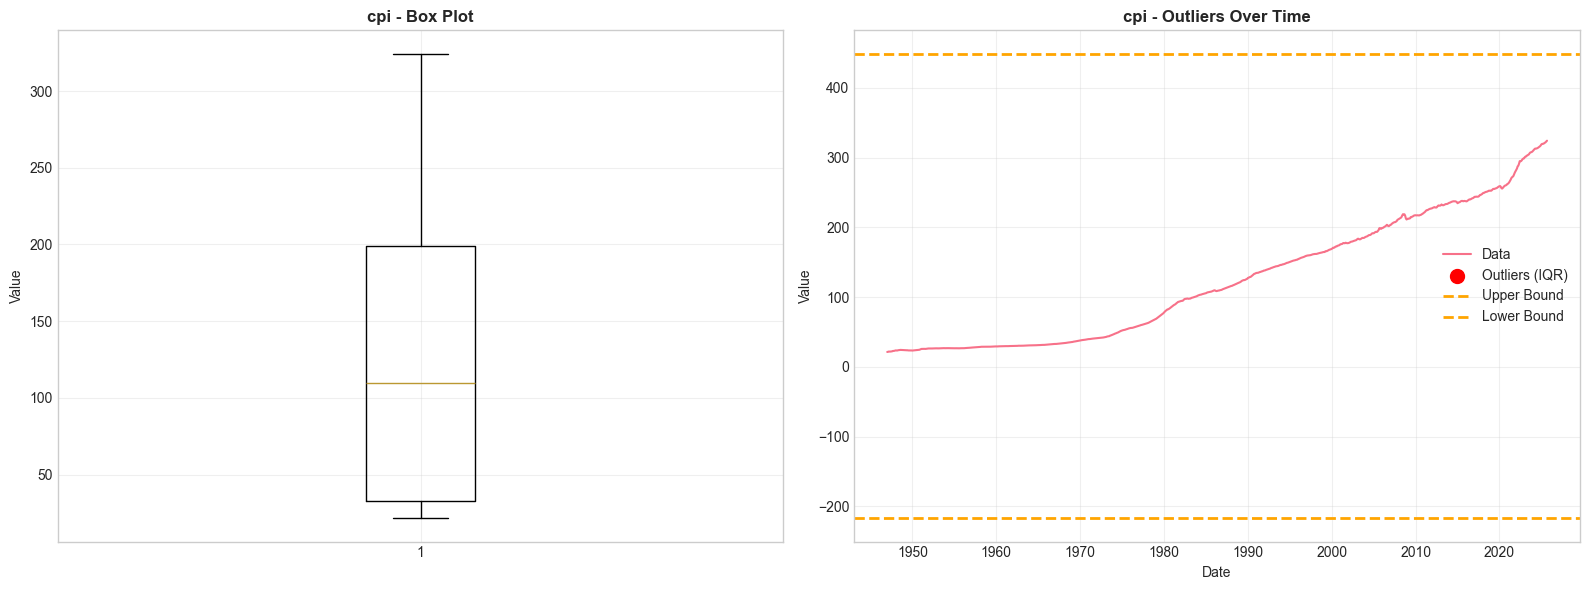


📊 Outlier Analysis for gdp:
   IQR Method: 0 outliers detected
   Z-score Method (|z| > 3): 0 outliers detected


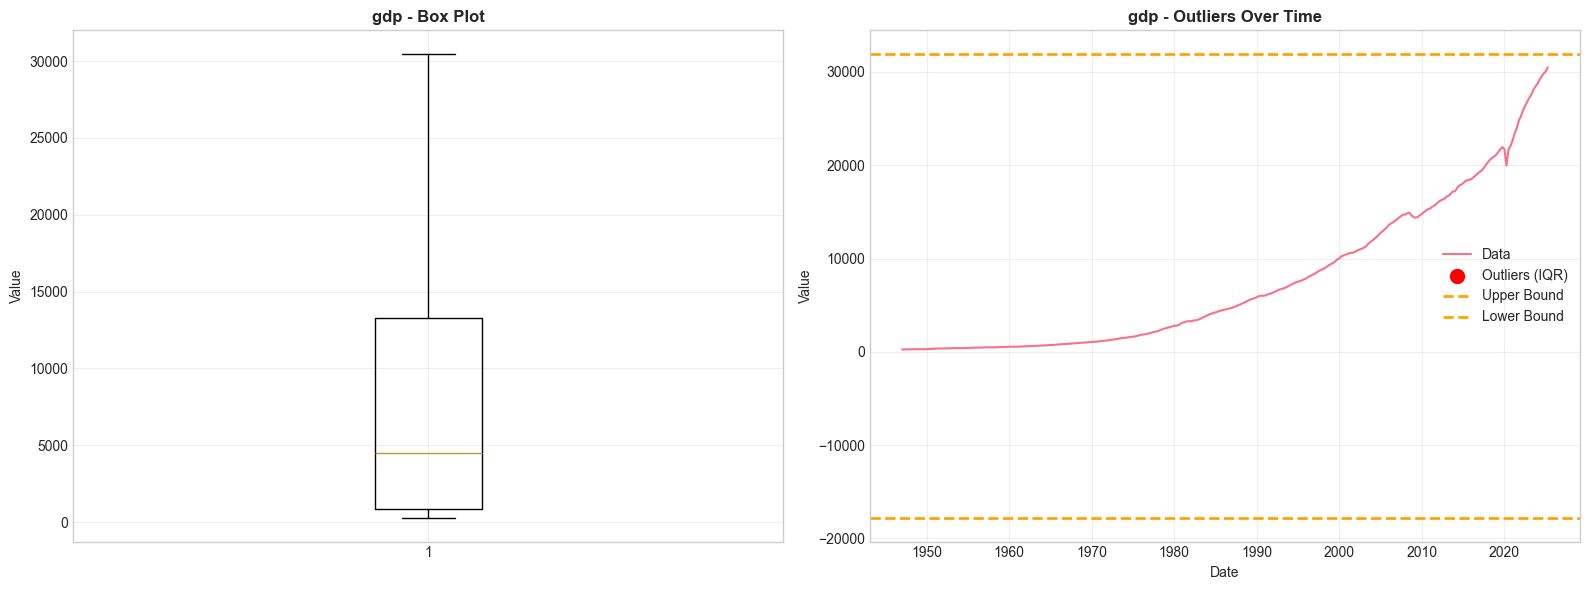


📊 Outlier Analysis for dff:
   IQR Method: 840 outliers detected
   Z-score Method (|z| > 3): 374 outliers detected

   Outlier dates (IQR):
      1973-07-03: 13.00
      1973-07-04: 13.00
      1974-05-29: 12.61
      1974-06-12: 12.47
      1974-06-27: 13.25
      1974-06-28: 13.31
      1974-06-29: 13.31
      1974-06-30: 13.31
      1974-07-01: 14.33
      1974-07-02: 13.86
      1974-07-03: 13.50
      1974-07-04: 13.50
      1974-07-05: 13.30
      1974-07-06: 13.30
      1974-07-07: 13.30
      1974-07-08: 13.93
      1974-07-09: 13.93
      1974-07-11: 13.41
      1974-07-12: 13.60
      1974-07-13: 13.60
      1974-07-14: 13.60
      1974-07-15: 13.33
      1974-07-24: 14.19
      1974-07-25: 12.64
      1974-07-26: 12.60
      1974-07-27: 12.60
      1974-07-28: 12.60
      1979-10-09: 13.86
      1979-10-11: 13.20
      1979-10-12: 12.97
      1979-10-13: 12.97
      1979-10-14: 12.97
      1979-10-15: 13.65
      1979-10-16: 13.31
      1979-10-17: 13.44
      1979-10-18: 

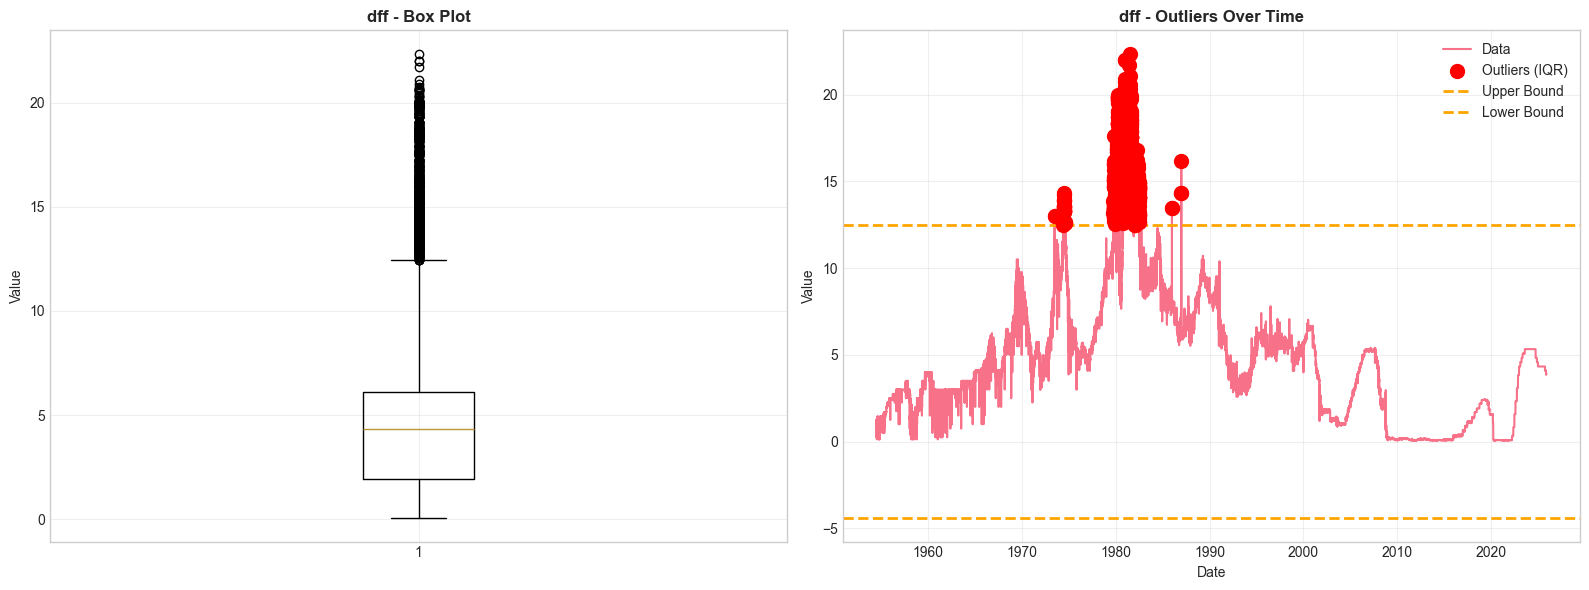


📊 Outlier Analysis for consumer:
   IQR Method: 0 outliers detected
   Z-score Method (|z| > 3): 0 outliers detected


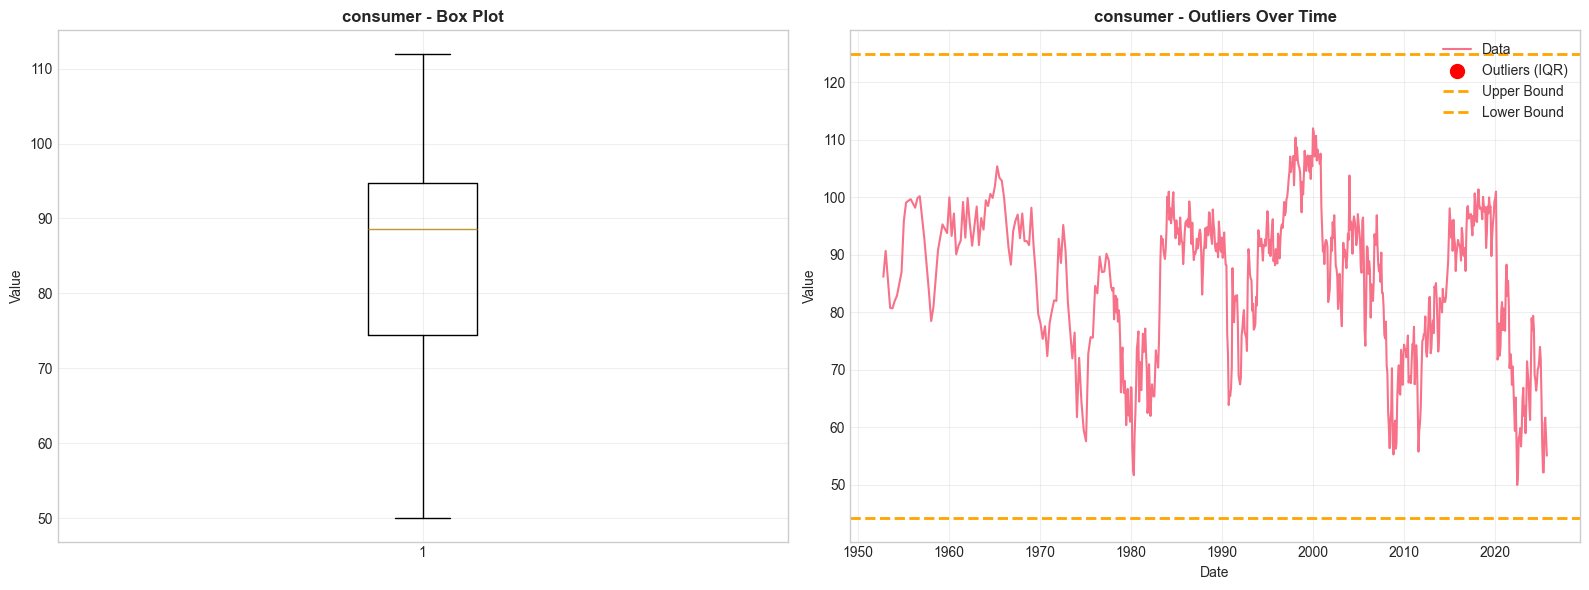

In [ ]:
# STEP 11: OUTLIER DETECTION
# ============================================
print("\n" + "="*60)
print("📊 STEP 11: OUTLIER DETECTION")
print("-"*60)

def detect_outliers(df, column):
    """
    Detect outliers using IQR method and Z-score
    """
    series = df[column].dropna()
    
    # IQR method
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_iqr = series[(series < lower_bound) | (series > upper_bound)]
    
    # Z-score method
    z_scores = np.abs(stats.zscore(series))
    outliers_z = series[z_scores > 3]
    
    print(f"\n📊 Outlier Analysis for {column}:")
    print(f"   IQR Method: {len(outliers_iqr)} outliers detected")
    print(f"   Z-score Method (|z| > 3): {len(outliers_z)} outliers detected")
    
    if len(outliers_iqr) > 0:
        print(f"\n   Outlier dates (IQR):")
        for date, value in outliers_iqr.items():
            print(f"      {date.date()}: {value:.2f}")
    
    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Box plot
    axes[0].boxplot(series, vert=True)
    axes[0].set_title(f'{column} - Box Plot', fontweight='bold')
    axes[0].set_ylabel('Value')
    axes[0].grid(True, alpha=0.3)
    
    # Time series with outliers highlighted
    axes[1].plot(series.index, series, label='Data', linewidth=1.5)
    axes[1].scatter(outliers_iqr.index, outliers_iqr.values, 
                    color='red', s=100, label='Outliers (IQR)', zorder=5)
    axes[1].axhline(y=upper_bound, color='orange', linestyle='--', 
                    linewidth=2, label='Upper Bound')
    axes[1].axhline(y=lower_bound, color='orange', linestyle='--', 
                    linewidth=2, label='Lower Bound')
    axes[1].set_title(f'{column} - Outliers Over Time', fontweight='bold')
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Value')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return outliers_iqr, outliers_z

# Detect outliers for all indicators
outlier_results = {}
for col in economic_data.columns:
    outlier_results[col] = detect_outliers(economic_data, col)


In [ ]:
# STEP 12: SUMMARY REPORT
# ============================================
print("\n" + "="*60)
print("📊 STEP 12: EDA SUMMARY REPORT")
print("="*60)

def generate_eda_report(df, stationarity_results, outlier_results):
    """
    Generate comprehensive EDA summary
    """
    report = []
    
    report.append("\n" + "="*60)
    report.append("EXPLORATORY DATA ANALYSIS - SUMMARY REPORT")
    report.append("="*60)
    
    report.append(f"\n📅 Time Period: {df.index.min().date()} to {df.index.max().date()}")
    report.append(f"📊 Number of Indicators: {df.shape[1]}")
    report.append(f"📈 Total Observations: {df.shape[0]}")
    
    report.append("\n" + "-"*60)
    report.append("INDICATOR SUMMARY:")
    report.append("-"*60)
    
    for col in df.columns:
        report.append(f"\n🔹 {col}:")
        report.append(f"   Mean: {df[col].mean():.2f}")
        report.append(f"   Std Dev: {df[col].std():.2f}")
        report.append(f"   Min: {df[col].min():.2f}")
        report.append(f"   Max: {df[col].max():.2f}")
        report.append(f"   Missing: {df[col].isnull().sum()} ({(df[col].isnull().sum()/len(df)*100):.1f}%)")
        
        # Stationarity
        if col in stationarity_results:
            p_value = stationarity_results[col][1]
            status = "Stationary" if p_value < 0.05 else "Non-Stationary"
            report.append(f"   Stationarity: {status} (p={p_value:.4f})")
        
        # Outliers
        if col in outlier_results:
            n_outliers = len(outlier_results[col][0])
            report.append(f"   Outliers: {n_outliers}")
    
    report.append("\n" + "="*60)
    report.append("KEY FINDINGS:")
    report.append("="*60)
    
    # Add key findings based on analysis
    report.append("\n✅ Data Quality:")
    total_missing = df.isnull().sum().sum()
    if total_missing == 0:
        report.append("   • No missing values detected")
    else:
        report.append(f"   • {total_missing} missing values require attention")
    
    report.append("\n✅ Correlations:")
    corr_matrix = df.corr()
    strong_corr = (corr_matrix.abs() > 0.7) & (corr_matrix < 1.0)
    n_strong = strong_corr.sum().sum() // 2
    report.append(f"   • {n_strong} pairs with strong correlation (|r| > 0.7)")
    
    report.append("\n✅ Stationarity:")
    stationary_count = sum([1 for col in stationarity_results 
                           if stationarity_results[col][1] < 0.05])
    report.append(f"   • {stationary_count}/{len(df.columns)} indicators are stationary")
    report.append(f"   • {len(df.columns) - stationary_count} require differencing for modeling")
    
    report.append("\n" + "="*60)
    report.append("NEXT STEPS:")
    report.append("="*60)
    report.append("1. Handle missing values (forward fill, interpolation)")
    report.append("2. Apply differencing to non-stationary series")
    report.append("3. Feature engineering (lags, rolling statistics)")
    report.append("4. Build forecasting models (ARIMA, Prophet, LSTM)")
    report.append("5. Evaluate model performance")
    report.append("="*60)
    
    # Print report
    for line in report:
        print(line)
    
    # Save to file
    with open('eda_report.txt', 'w') as f:
        f.write('\n'.join(report))
    
    print("\n💾 Report saved to 'eda_report.txt'")

generate_eda_report(economic_data, stationarity_results, outlier_results)

print("\n" + "="*60)
print("🎉 EDA COMPLETE!")
print("="*60)
print("\n✅ All analysis steps completed successfully!")
print("✅ Visualizations generated")
print("✅ Statistical tests performed")
print("✅ Summary report created")
print("\nYou're now ready to build forecasting models! 🚀")


📊 STEP 12: EDA SUMMARY REPORT

EXPLORATORY DATA ANALYSIS - SUMMARY REPORT

📅 Time Period: 1946-01-01 to 2025-11-17
📊 Number of Indicators: 5
📈 Total Observations: 26167

------------------------------------------------------------
INDICATOR SUMMARY:
------------------------------------------------------------

🔹 unemployment:
   Mean: 5.67
   Std Dev: 1.71
   Min: 2.50
   Max: 14.80
   Missing: 25235 (96.4%)
   Stationarity: Stationary (p=0.0018)
   Outliers: 8

🔹 cpi:
   Mean: 123.42
   Std Dev: 88.82
   Min: 21.48
   Max: 324.37
   Missing: 25222 (96.4%)
   Stationarity: Non-Stationary (p=1.0000)
   Outliers: 0

🔹 gdp:
   Mean: 7600.85
   Std Dev: 7972.38
   Min: 243.16
   Max: 30485.73
   Missing: 25853 (98.8%)
   Stationarity: Non-Stationary (p=1.0000)
   Outliers: 0

🔹 dff:
   Mean: 4.61
   Std Dev: 3.56
   Min: 0.04
   Max: 22.36
   Missing: 94 (0.4%)
   Stationarity: Stationary (p=0.0490)
   Outliers: 840

🔹 consumer:
   Mean: 84.90
   Std Dev: 13.22
   Min: 50.00
   Max: 112.0